In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from data_structs import NewsDataLoader, EvaluationDataLoader, ScorePackage
from utils import model_predict, model_evaluate, model_predict_evaluate

#importing the data
news = pd.read_csv('../dataset_processed/fakeNews_titleStemming_Sampled.csv', index_col=0)
news.reset_index(inplace=True)

from sklearn.model_selection import train_test_split
train_news, test_news = train_test_split(news, test_size=0.2, 
                                         random_state=7)

train_news_predictors_rnn = train_news['title']
train_news_predictors = train_news.drop(columns = ['title', 'label'])
train_news_target = train_news['label']
train_news_loader = NewsDataLoader(train_news_predictors, train_news_target)
train_news_loader_rnn = NewsDataLoader(train_news_predictors_rnn, train_news_target)

test_news_predictors_rnn = test_news['title']
test_news_predictors = test_news.drop(columns = ['title', 'label'])
test_news_target = test_news['label']
test_news_loader = NewsDataLoader(test_news_predictors, test_news_target)
test_news_loader_rnn = NewsDataLoader(test_news_predictors_rnn, test_news_target)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Create list of models in the ensemble
base_models = [('logreg', LogisticRegression(solver='liblinear')),
              ('tree', DecisionTreeClassifier(max_depth=8))]

## Final model used to aggregate predicted probs
my_final_estimator = DecisionTreeClassifier(max_depth=2)

## Create stack
from sklearn.ensemble import StackingClassifier
model_stack = StackingClassifier(estimators = base_models, final_estimator = my_final_estimator, 
                              stack_method ='predict_proba', cv=5)

## Fit and Evaluate (cv is done internally in StackingClassifier)
fitted_stack = model_stack.fit(train_news_loader.predictors, 
                               train_news_loader.target)

For <stack> evaluated on <train> Dataset:
    - accuracy: 0.929
    - precisionn: 1.0
    - recall: 0.854
    - f1 score: 0.928
For <stack> evaluated on <test> Dataset:
    - accuracy: 0.92
    - precisionn: 1.0
    - recall: 0.843
    - f1 score: 0.92


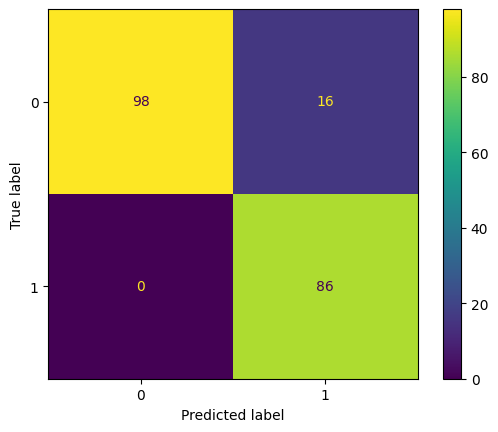

In [19]:
score_package_train_stack, score_package_test_stack = model_predict_evaluate(
        model=model_stack, 
        name_model='stack', 
        train_news_loader=train_news_loader,
        test_news_loader=test_news_loader
)